In [135]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-customer-churn-prediction/Churn_Modelling.csv


# 1. Project Overview

**The objective of this project is to analyze customer data from a banking institution to identify key factors contributing to customer churn (exit). By leveraging exploratory data analysis (EDA), this study uncovers high-risk customer segments and provides actionable recommendations to improve retention rates.**

In [136]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('/kaggle/input/bank-customer-churn-prediction/Churn_Modelling.csv')
df.head()
df.info()
df.shape
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# 2. Key Insights from Data Analysis

**A. Demographic Vulnerabilities**

Age Factor: Customers aged between 40 and 60 exhibit the highest churn probability, whereas younger customers (under 30) are more likely to stay.

Geographic Trends: Germany shows a significantly higher churn rate compared to France and Spain, suggesting potential market-specific service issues.

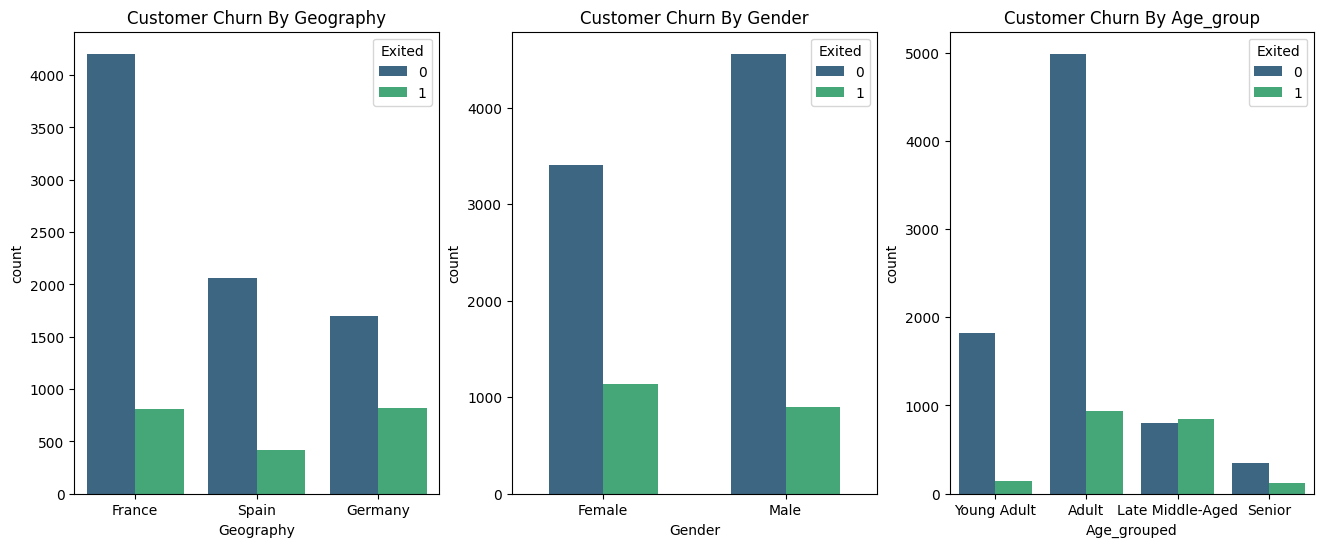

In [137]:
bins = [0, 30, 45, 60, 120]
labels = ['Young Adult', 'Adult', 'Late Middle-Aged', 'Senior']

df['Age_grouped'] = pd.cut(df['Age'],bins=bins, labels=labels)

plt.figure(figsize=(16,6))
plt.subplot(1,3,1)

sns.countplot(data=df, x='Geography', hue='Exited', palette='viridis',width=0.8)
plt.title('Customer Churn By Geography')

plt.subplot(1,3,2)
sns.countplot(data=df, x='Gender', hue='Exited', palette='viridis', width=0.6)
plt.title('Customer Churn By Gender')

plt.subplot(1,3,3)
sns.countplot(data=df, x='Age_grouped', hue='Exited',palette='viridis')
plt.title('Customer Churn By Age_group')
plt.show()

**B. Behavioral & Engagement Patterns**

Product Overload: Interestingly, customers using 3 or more products have an extremely high exit rate, nearly 100% in some cases. This indicates that complexity or higher fees associated with multiple products may drive customers away.

Activity Level: Non-active members are twice as likely to churn compared to active members. Maintaining customer engagement is a critical factor in loyalty.

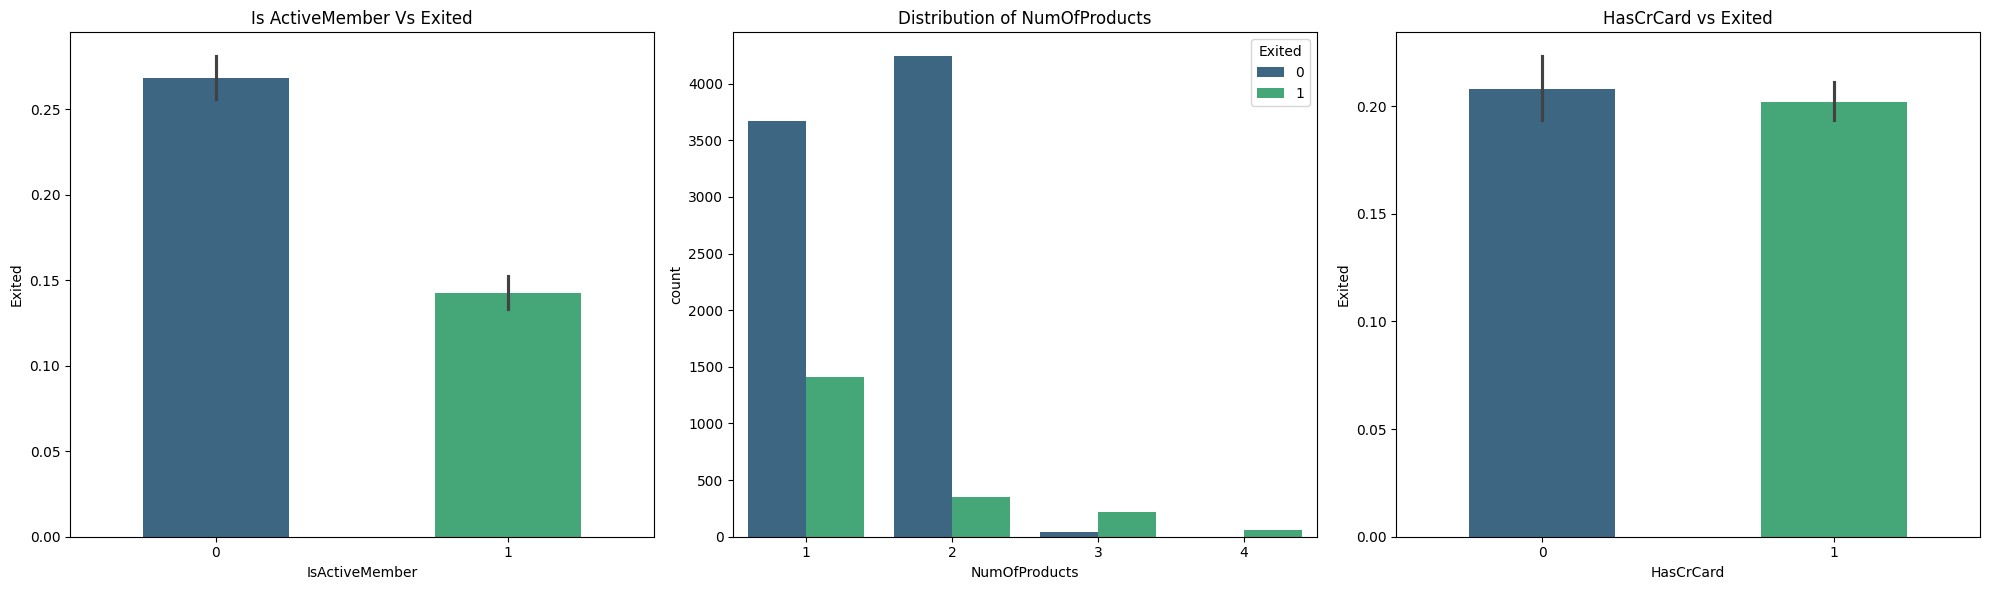

In [138]:
fig, axes = plt.subplots(1,3, figsize=(20,6))

sns.barplot(ax=axes[0], x='IsActiveMember', y='Exited', data=df, palette='viridis', width=0.5)
axes[0].set_title('Is ActiveMember Vs Exited')

sns.countplot(ax=axes[1], x='NumOfProducts', hue='Exited', data=df, palette='viridis')
axes[1].set_title('Distribution of NumOfProducts')

sns.barplot(ax=axes[2], x='HasCrCard', y='Exited',data=df, palette='viridis', width=0.5)
axes[2].set_title('HasCrCard vs Exited')

plt.tight_layout()
plt.show()

**C. Financial Status Correlation**

Account Balance: Customers with a balance between $100,000 and $150,000 show a higher tendency to exit.

Salary & Credit Score: Estimated salary alone shows a weak correlation with churn, but customers with very low credit scores (below 400) are higher-risk individuals.

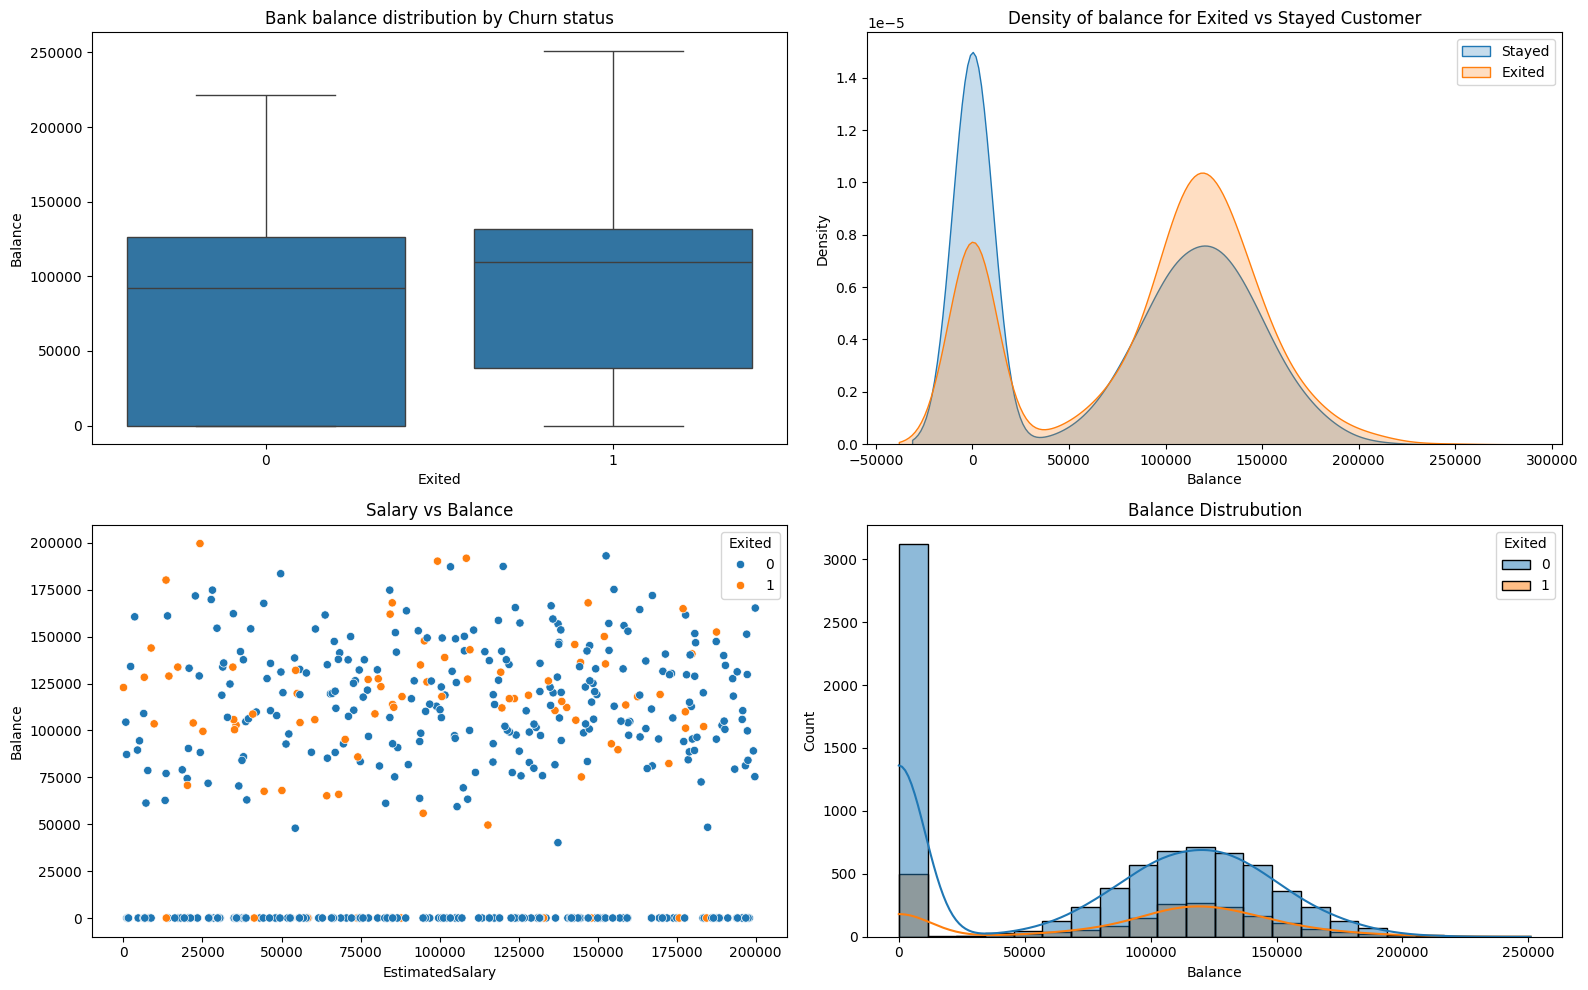

In [139]:
fig, axes = plt.subplots(2,2, figsize=(16,10))

sns.boxplot(ax=axes[0,0],x='Exited', y='Balance', data=df)
axes[0,0].set_title('Bank balance distribution by Churn status')

sns.kdeplot(ax=axes[0,1],x=df[df['Exited']==0]['Balance'], label='Stayed', fill=True)
sns.kdeplot(ax=axes[0,1],x=df[df['Exited']==1]['Balance'], label='Exited', fill=True)
axes[0,1].set_title('Density of balance for Exited vs Stayed Customer')
axes[0,1].legend()

sns.scatterplot(ax=axes[1,0], x='EstimatedSalary', y='Balance', hue='Exited', data=df.sample(500))
axes[1,0].set_title('Salary vs Balance')

sns.histplot(ax=axes[1,1], x='Balance', data=df,hue='Exited', kde=True )
axes[1,1].set_title('Balance Distrubution')

plt.tight_layout()
plt.show()

# 3. Engineered Predictive Features

**To enhance the analysis, new metrics were developed:**

Balance-to-Salary Ratio: Identified that customers with high savings relative to their income but low engagement are at risk of moving to competitors.

Tenure-by-Age: Highlighted that newer customers who joined later in life (lower ratio) are less loyal than long-term customers.

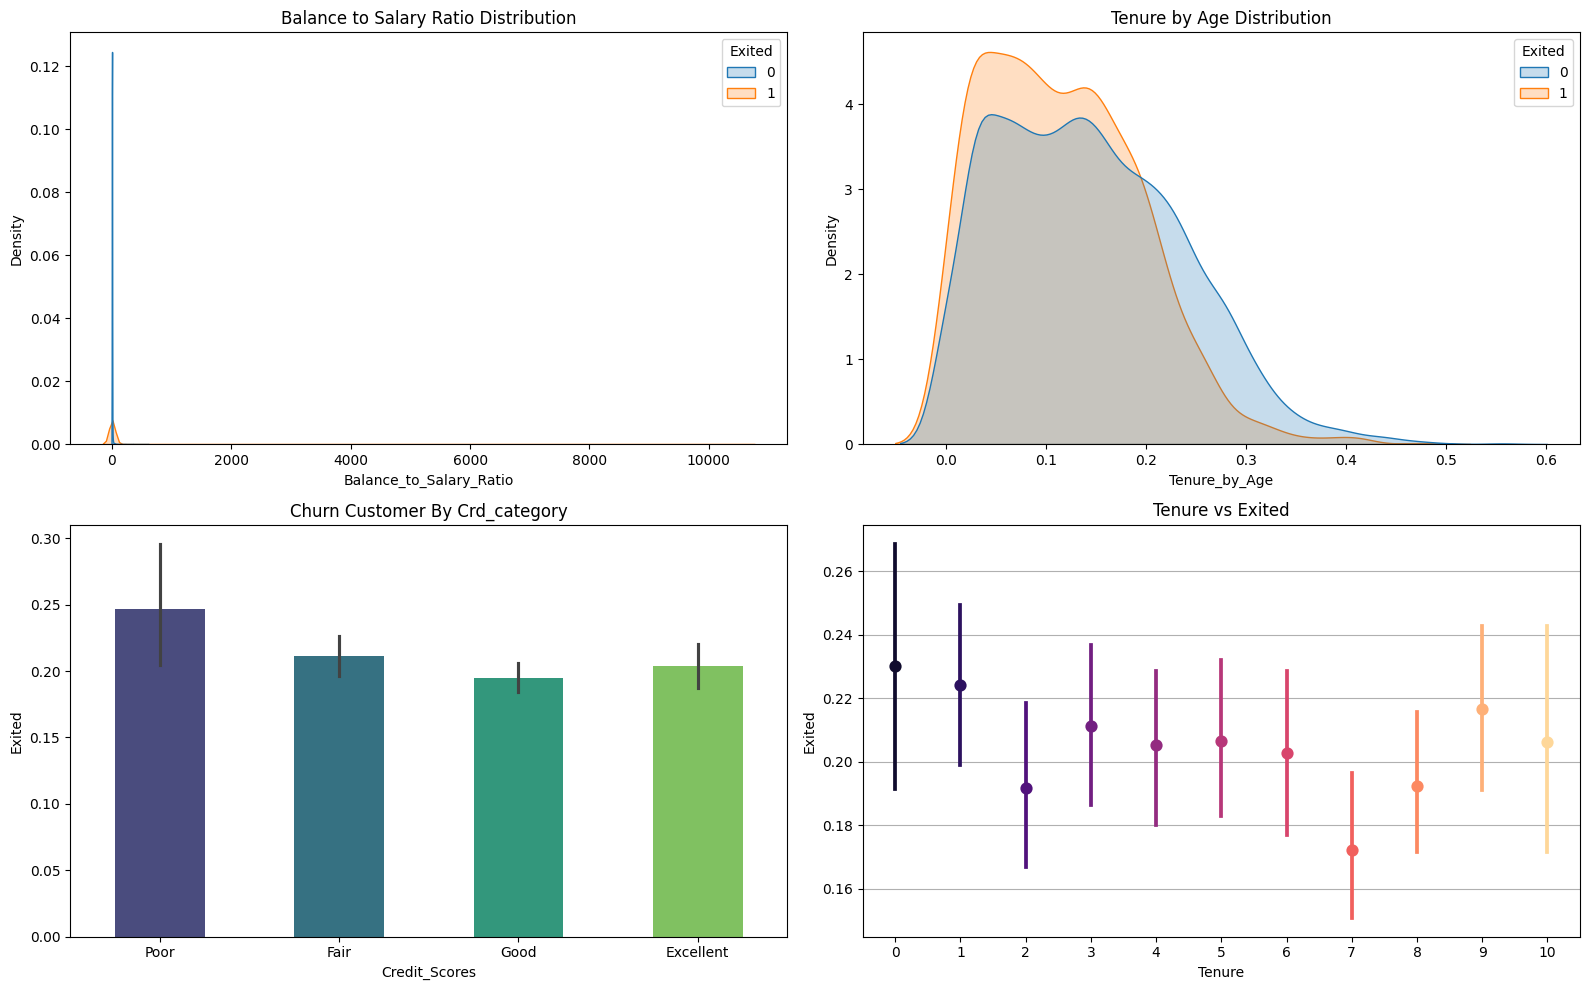

In [140]:
# Balance_to_Salary_Ratio

df['Balance_to_Salary_Ratio'] = df['Balance'] / df['EstimatedSalary']

# Tenure_by_Age

df['Tenure_by_Age'] = df['Tenure'] / df['Age']

# CreditScore_Category

bins = np.linspace(df['CreditScore'].min(), df['CreditScore'].max(), num=5)
labels = ['Poor', 'Fair', 'Good', 'Excellent']

df['Crd_category'] = pd.cut(df['CreditScore'], bins=bins, labels=labels)

fig, axes = plt.subplots(2, 2, figsize=(16,10))

# Balance to Salary Ratio
sns.kdeplot(ax=axes[0,0], data=df, x='Balance_to_Salary_Ratio', hue='Exited', fill=True, common_norm=False)
axes[0,0].set_title('Balance to Salary Ratio Distribution')

# Tenure by Age
sns.kdeplot(ax=axes[0,1], data=df, x='Tenure_by_Age', hue='Exited', fill=True, common_norm=False)
axes[0,1].set_title('Tenure by Age Distribution')

sns.barplot(ax=axes[1,0],x='Crd_category', y='Exited', data=df, palette='viridis', width=0.5)
axes[1,0].set_title('Churn Customer By Crd_category')
axes[1,0].set_xlabel('Credit_Scores')
plt.grid()

sns.pointplot(ax=axes[1,1],x='Tenure', y='Exited', data=df, palette='magma')
axes[1,1].set_title('Tenure vs Exited')

plt.tight_layout()
plt.show()

# 4. Correlation & Feature Relationships

In this project, I performed a deep-dive correlation analysis using a Heatmap to understand the linear relationships between different customer attributes and their tendency to churn.

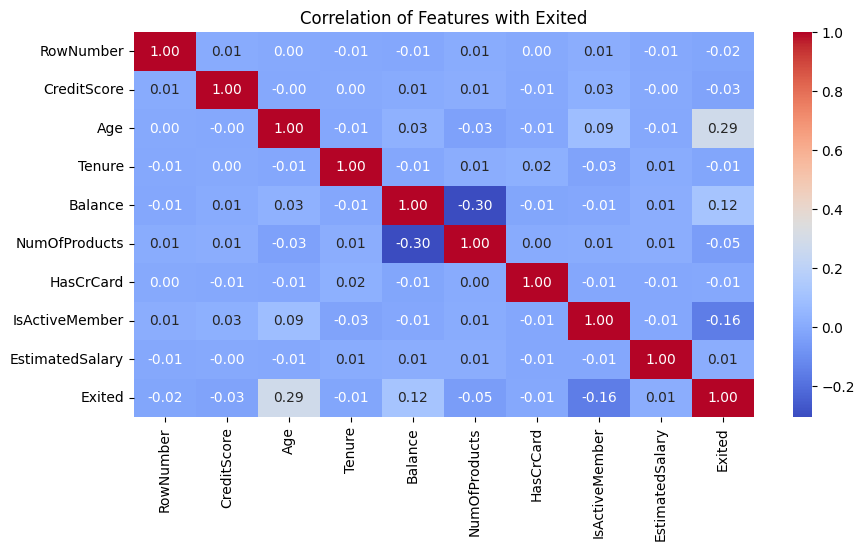

In [141]:
drop_columns = ['CustomerId','Surname','Geography','Gender','Age_grouped','Crd_category','Balance_to_Salary_Ratio','Tenure_by_Age']
num_df = df.drop(columns=drop_columns)
num_df.head()

plt.figure(figsize=(10,5))
sns.heatmap(num_df.corr(), annot=True, cmap='coolwarm',fmt='.2f')
plt.title('Correlation of Features with Exited')
plt.show()

# 4. Strategic Recommendations (အကြံပြုချက်များ)

1.Retention for Mid-Aged Group: အသက် ၄၀-၆၀ ကြား Customer များအတွက် အထူးပြုလုပ်ထားသော Retirement plans သို့မဟုတ် Wealth management ဝန်ဆောင်မှုများ ပေးရန်။

2.Product Optimization: Product ၃ ခု၊ ၄ ခု သုံးစွဲသော Customer များ စိတ်ပျက်ရသည့် အကြောင်းရင်း (ဥပမာ- ရှုပ်ထွေးသော ဝန်ဆောင်မှု သို့မဟုတ် မြင့်မားသော အခကြေးငွေ) ကို ပြန်လည်စစ်ဆေးပြီး ဝန်ဆောင်မှုကို ရိုးရှင်းစေရန်။

3.Active Engagement Campaign: Inactive ဖြစ်နေသော Customer များကို App notification သို့မဟုတ် Promotion အသစ်များမှတစ်ဆင့် ပြန်လည်ဆွဲဆောင် (Re-engage) ရန်။

4.Market-Specific Strategy (Germany): ဂျာမနီနိုင်ငံရှိ ပြိုင်ဘက်ဘဏ်များ၏ ကမ်းလှမ်းချက်များကို လေ့လာပြီး မိမိဘဏ်၏ ဝန်ဆောင်မှုကို ပိုမိုကောင်းမွန်အောင် ပြင်ဆင်ရန်။

# 5. Conclusion

**ယခု Analysis အရ Customer များ၏ အသက်အရွယ် နှင့် Product သုံးစွဲမှု အရေအတွက် သည် Churn ဖြစ်ခြင်းကို ခန့်မှန်းရန် အရေးကြီးဆုံးသော အချက်များ ဖြစ်ပါသည်။ အထက်ပါ အကြံပြုချက်များကို အကောင်အထည်ဖော်ခြင်းဖြင့် ဘဏ်၏ Customer Retention ကို ထိရောက်စွာ မြှင့်တင်နိုင်မည် ဖြစ်ပါသည်။**